# Proyecto 1: Identificando números con imágenes
En este proyecto analizamos e identificamos números dados en la forma de imágenes. Para ello utilizamos los modelos de Random Fores, Naive Bayes y Regresión Logística para identificar grupos de imágenes similares. Dado esto proseguimos con el entrenamiento de datos y la reducción de dimensionalidad, para hacer que se familiarice con la información proporcionada y encuentre patrones que a futuro junto a los modelos, nos proporcionen distintas respuestas, las cuales analizaremos para determinar cual de ellas nos funciona mejor.                                  


## Descripción del proyecto
En este proyecto identificamos grupos en imágenes para reconocimiento de números. Para esto, realizamos los siguientes pasos:
1. Dado que nuestros datos están en diferentes escalas, es necesario normalizar los datos.
2. Aplicar un método de reducción de dimensionalidad y visualizar los datos
3. Buscar grupos en los datos reducidos con alguna técnica de agrupamiento o clasificación.
4. Interpretar los resultados.
5. Dadas dos imágenes nuevas, identificar a que grupo pertenece. (Inferencia)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

 ## 1. Analizando los datos
 Comenzamos leyendo nuestros datos y visualizando algunos ejemplos para analizarlos. En este caso utilizaremos el [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py), previamente proporcionado para esta actividad. En este dataset encontrarás 1797 imágenes de 8x8. Cada imagen es un dígito escrito a mano. Primero separaremos los datos en entrenamiento y validación. 
 
 *La segmentación de datos nos ayuda a determinar cuales nos ayudaran a entrenar los modelos y cuales serán para evaluar el rendimiento de los modelos*

In [2]:
# Cargamos nuestros datos y los separamos en entrenamiento y validación
data, labels = load_digits(return_X_y=True)
data_train, data_val, target_train, target_val = train_test_split(
    data, 
    labels, 
    test_size=0.25
)
print(f"Imágenes en rango {np.max(data)}, {np.min(data)}")

# Entrenamiento
(n_samples, n_features), n_digits = data_train.shape, np.unique(target_train).size
print(f"# Dígitos: {n_digits}; # Muestras de entrenamiento: {n_samples}; # Variables {n_features}")

# Validación
(n_samples, n_features), n_digits = data_val.shape, np.unique(target_val).size
print(f"# Dígitos: {n_digits}; # Muestras de validación: {n_samples}; # Variables {n_features}")

Imágenes en rango 16.0, 0.0
# Dígitos: 10; # Muestras de entrenamiento: 1347; # Variables 64
# Dígitos: 10; # Muestras de validación: 450; # Variables 64


<Figure size 640x480 with 0 Axes>

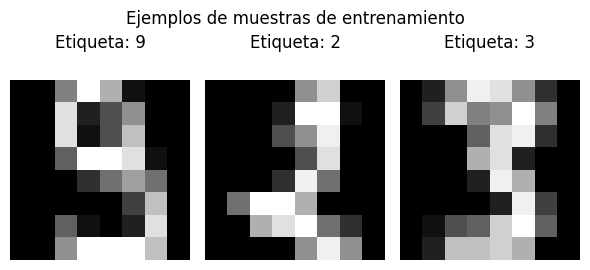

In [3]:
plt.gray()

# Visualizar algunas imágenes
n_cols = 3
idx = np.random.randint(len(data_train), size=n_cols)
fig, axes = plt.subplots(1, n_cols, figsize=(6,3))
axes = axes.flatten()
for ax, i in zip(axes, idx):
    side = np.sqrt(len(data_train[i])).astype('int')
    # La imagen está dada como un solo vector de longitud 64
    # Cambiamos la forma para tenerla en forma de imagen de 8x8 pixeles
    img = data[i].reshape((side, side))
    ax.matshow(img)
    ax.axis('off')
    ax.set_title(f"Etiqueta: {labels[i]}")
fig.suptitle("Ejemplos de muestras de entrenamiento")
plt.tight_layout()
plt.show()

En el código anterior las imágenes son entregadas como un vector de 64 variables, donde cada elemento corresponde al valor de un pixel. Para visualizar los datos en forma de imagen, fue necesario transformarlos a la forma adecuada. En la celda se puede visualizar 3 imágenes de ejemplo, así como la forma en que podemos transformar el vector de variables a una matriz de 8x8.


## Visualización en baja dimensionalidad
En la siguiente celda puedes visualizar como se ven tus datos reduciendo la dimensionalidad de 30 variables a 2. Explora usar TSNE y PCA, y elige el que te de mejor información.

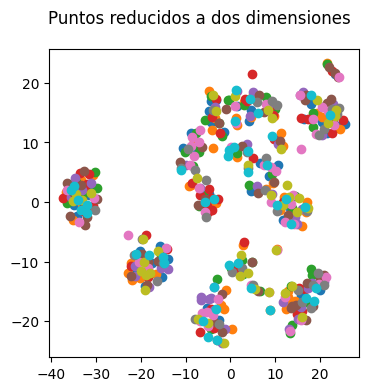

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# TODO Reducimos la dimensionalidad de los datos de validacion data_val
# a 2 dimensiones usando TSNE y/o PCA

#pca=PCA(2)
#reduced_data=pca.fit_transform(data_val)
tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(data_val)


labels = np.unique(target_train)
fig, ax_pca = plt.subplots(1, 1, figsize=(4,4))
fig.suptitle("Puntos reducidos a dos dimensiones")
for c in labels:
    indices = np.where(target_train == c)[0]
    indices = indices[indices < reduced_data.shape[0]]
    plot_data = reduced_data[indices]
    ax_pca.scatter(plot_data[:, 0], plot_data[:, 1], label=f"Grupo {c}")
plt.show()

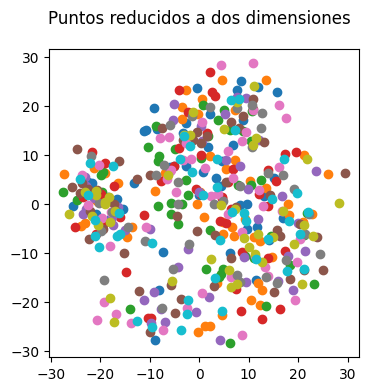

In [5]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_val)

labels = np.unique(target_train)
fig, ax_pca = plt.subplots(1, 1, figsize=(4,4))
fig.suptitle("Puntos reducidos a dos dimensiones")
for c in labels:
    indices = np.where(target_train == c)[0]
    indices = indices[indices < reduced_data.shape[0]]
    plot_data = reduced_data[indices]
    ax_pca.scatter(plot_data[:, 0], plot_data[:, 1], label=f"Grupo {c}")
plt.show()

## Conclusión 
En base a la comparación de los resultados proporcionados por la reducción en TSNE y PCA, concluimos que la implementación de TSNE es el más adecuado. Gracias a que proporciono una imagen resultante donde se muestra una delimitación más acertada en la agrupación de puntos, mostrando con esto ser más asertiva para los modelos de nuestro proyecto.

# 2. Entrenamiento
Se utilizan los datos `data_train` con las etiquetas `target_train` y define para entrenar un modelo que identifique dígitos. 
Para ello se utilizan las librerías de sklearn para entrenar los modelos. 
- En este caso se entrenaron en baja dimensionalidad
- Se compararan Random Fores, Naive Bayes y Regresión Logística
- Se normalizan las entradas


Se implemento normalizacion gracias a que es muy comun, normalizar las entradas antes de entrenar el modelo. Para ello, debemos normalizar también los datos de validación durante inferencia de la misma manera en que normalizamos los datos de entrenamiento.

In [6]:
# TODO: Importa las clases que necesites para entrenar los modelos de sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Entontramos los valores de normalización USANDO LOS DATOS DE ENTRENAMIENTO
scaler = StandardScaler()
scaler.fit(data_train)

def train(X, label, model_type:str):
    # Normalizamos los datos de entrenamiento
    data = scaler.transform(X)
    
    # TODO: Entrena el modelo y regresa el modelo entrenado en los datos de entrenamiento
    # model puede ser tanto la instancia de la clase que quieras usar, como un string indicando
    if model_type == "RandomForests":
        
        clf = RandomForestClassifier(n_estimators=50)
        estimator =  clf.fit(data, label)
    elif model_type == "NaiveBayes":
        nb = GaussianNB()
        estimator = nb.fit(data,label)
    else: 
        LR=LogisticRegression()
        estimator = LR.fit(data,label)

    return estimator

def inference(trained_model, X_val):
    # En inferencia, podemos recibir un solo dato entonces X_val.shape seria (D, )
    # Las clases de sklearn siempre esperan todo en la forma de  N, D
    if X_val.ndim == 1:
        X_val = X_val.reshape(1, -1)

    # TODO: Normaliza los datos de validación
    # El mismos preprocesamiento de datos se aplica a
    # tanto inferencia como entrenamiento
    data = scaler.transform(X_val)
    
    #data = trained_model.transform(reduced_data)

    # TODO: Utiliza el modelo para predecir valores para los datos de validación
    # Regresa las predicciones de tu modelo para X_val
    # En este caso, modelo tiene que ser una instancia de una clase para la cual quieres hacer predicción
    preds=trained_model.predict(data)
    return preds

trained_models = {
    "RandomForests": None,
    "NaiveBayes": None,
    "LogisticRegression": None,
    
}
for model_type in trained_models.keys():
    modelo = train(data_train, target_train, model_type=model_type)
    trained_models[model_type] = modelo

# Presentacion de modelos
En esta sección, se introducirá brevemente a los modelos clave de nuestro proyecto. Random forest, Naive bayes y Regresion logistica los cuales cuenta con cualidades distintas pero que fungen en este proyecto como un medio para lograr identificar números con imágenes. 

## Random Forest
Random Forest es un algoritmo de aprendizaje automático supervisado potente y versátil que crece y combina múltiples árboles de decisión para crear un "bosque". Se puede utilizar tanto para problemas de clasificación como de regresión en R y Python.

Random Forest genera múltiples árboles de decisión que se fusionan para una predicción más precisa.

La lógica detrás del modelo de bosque aleatorio es que múltiples modelos no correlacionados (los árboles de decisión individuales) funcionan mucho mejor en grupo que por separado. Cuando se utiliza Random Forest para la clasificación, cada árbol proporciona una clasificación o un "voto". El bosque elige la clasificación con la mayoría de los “votos”. Cuando se utiliza Random Forest para la regresión, el bosque selecciona el promedio de las salidas de todos los árboles.

## Naive Bayes
En un sentido amplio, los modelos de Naive Bayes son una clase especial de algoritmos de clasificación de Aprendizaje Automatico . En ellos se asume que la presencia de una cierta característica en un conjunto de datos no está en absoluto relacionada con la presencia de cualquier otra característica.

Las técnicas Naive Bayes necesitan una forma de calcular la probabilidad ‘posterior’ de que prevenga un cierto evento A, dadas algunas probabilidades de eventos ‘anteriores’.

## Regresión logística 
La regresión logística es una técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro.

En general, la regresión logística explora cómo las variables independientes afectan a una variable dependiente al observar los valores de datos históricos de ambas variables.


# 3. Evaluación y análisis de las predicciones
En esta sección incluimos funciones que te permiten visualizar la predicción de tu modelo para el set de validación. Dado que nuestros datos son de alta dimensionalidad (64) necesitamos reducirlos para poder analizar las predicciones.


# Justificación de implementación
## Random Forest
Se implementó Random Forest gracias a que es bueno manejando grandes cantidades de datos, al ser un modelo versátil, que se dice que es fácil de implementar y de ajustar, y consideramos que sería interesante ver su forma de trabajar para compararla con los demas modelos. 
## Naive Bayes
Naive bayes se implementó debido a que tiende a ser un modelo muy rápido que a su vez no consume tantos recursos, dentro de la investigación de este modelo la cantidad de datos a usar es algo que es versátil para este modelo que funciona bien tanto con pocos como con muchos.
## Regresión logística
El modelo de Regresión logística fue implementado gracias a que se especializa en problemas de clasificación, su proceso matemático con enfoque probabilístico lo vuelve una buena opción para la actividad a emplear. 

## 3.1 (Inferencia) Datos de validación en baja dimensionalidad
Completa el código de la siguiente celda para visualizar **las predicciones de TU modelo** de el conjunto de validación en baja dimensionalidad. Utiliza el método de reducción de dimensionalidad que consideres te ayude mejor a analizar tus datos. Cada clase/grupo deberá mostrarse en un color diferente. En base a lo que puedes observar en la imagen, ¿consideras que tu algoritmo ha aprendido algo que tiene sentido?

In [7]:
def vis_low_dim(data_val, preds, model_type):
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    fig.suptitle(f"Puntos clasificados {model_type} (2 dimensiones)")

    # Buscamos la cantidad de grupos que hay en los datos de validación
    groups = np.unique(preds)
    n_groups = len(groups)
    # Graficamos los datos, con un color diferente para cada clase/grupo
    print(f"Datos {data_val.shape}, predicciones {preds.shape}, clases/grupos {n_groups}")

    # TODO: Reduce los datos de VALIDACIÓN data_val a dos dimensiones para poder visualizarlos
    tsne = TSNE(n_components=2)
    reduced_data = tsne.fit_transform(data_val)
    for g in groups:
        # TODO: Grafica los datos de VALIDACIÓN reducidos (reduced_data.shape = (N, 2))
        # Tal que grafiques aquellos que correspondan al grupo/clase group
        # Investiga plt.scatter, np.where o cómo filtrar arreglos dada una condición booleana
        indices = np.where(preds == g)
        plot_data = reduced_data[indices]
        ax.scatter(plot_data[:, 0], plot_data[:, 1], label=f"Grupo {g}")
        
    fig.show()
    fig.legend()

Datos (450, 64), predicciones (450,), clases/grupos 10
Datos (450, 64), predicciones (450,), clases/grupos 10
Datos (450, 64), predicciones (450,), clases/grupos 10


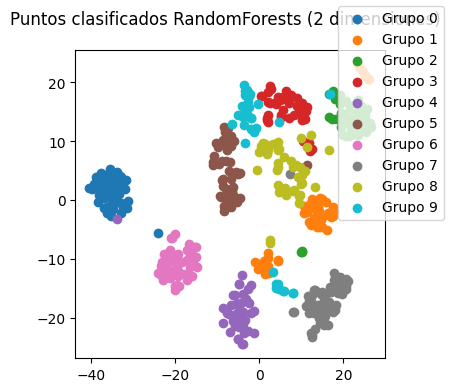

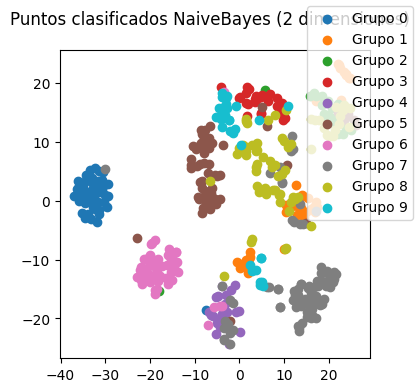

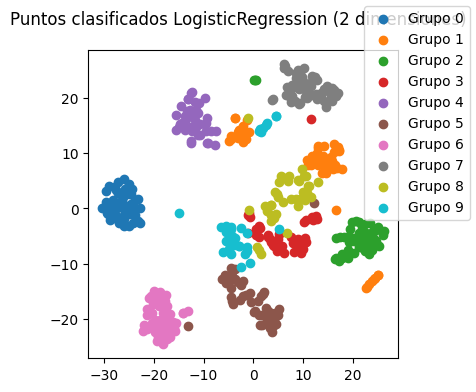

In [11]:
modelo = trained_models["RandomForests"]

# Llamamos a inferencia de tu modelo
for model_type, modelo in trained_models.items():
    preds = inference(modelo, data_val)
    vis_low_dim(data_val, preds, model_type)

# Análisis de resultados
Se prevé hacer una descripción de lo mostrado en las imágenes anteriores, las cuales son el resultado de la validación de los procesos en baja dimensionalidad de cada modelo aplicado. Cada imagen muestra una serie de puntos de color agrupados, dado que cada uno esta segmentado, esto quiere decir que cada grupo de puntos de un mismo color representa las características de un numero dado una imagen. En casos específicos en los que no es muy clara o los puntos están muy dispersos, nos ayuda a determinar que tan certero es el modelo visualmente.

## Random Forest
La imagen muestra la mayoría de las agrupaciones bien seccionadas, teniendo ciertos puntos de algunas figuras dispersos en otros puntos de la imagen. No obstante, cada imagen a pesar de que en algunas partes las características son parecidas, existe una notable agrupación en los puntos teniendo pequeñas dispersiones, pero sin dejar mostrar que hay una figura.

## Naive Bayes
En la imagen anterior representante de este modelo, la agrupación de los datos es un tanto junta. A simple vista puedes notar que existen grupos de puntos, pero denota una excesiva cantidad de puntos de alguna agrupación muy dispersa en la imagen. Así mismo, las agrupaciones con características parecidas parecen ser una misma figura, no contando con una separación que muestre visualmente lo contrario probando que es correcto el resultado.

## Regresión logística
En el resultado de este método podemos visualizar una separación coherente de las agrupaciones de puntos, aunque en la zona media cuente con su punto de figuras con características parecidas generando problemas para entender la separación de los datos, no obstante, los puntos que se comparten de las figuras no son excesivos.


## 3.2 (Inferencia) Visualizar imagenes en cada grupo/clase
Completa el código de la siguiente celda. El siguiente código llama al método de inferencia anteriormente definido. Deberás mostrar 1 imagen por cada grupo de predicción de tu modelo, intenta seleccionar una imagen representativa del grupo tal que puedas ver que es lo que ha aprendido tu modelo.

#### Métodos de clasificación
Si utilizaste un método de clasificación multiclase, los esperable sería que el valor real de la muestra (GT) sea igual al valor de la predicción para al menos la mayoría de los casos.

#### Métodos de agrupamiento
Si utilizaste un algoritmo de agrupamiento, es esperable que el valor real de la muestra (GT) no sea igual al grupo de tu predicción. Recuerda que al ser aprendizaje no supervisado, necesitamos adicionalmente "mapear" los grupos que haya encontrado el algoritmo a los reales. Puedes usar esta sección para hacer dicho mapeo. Lo mas sencillo es usar un diccionario

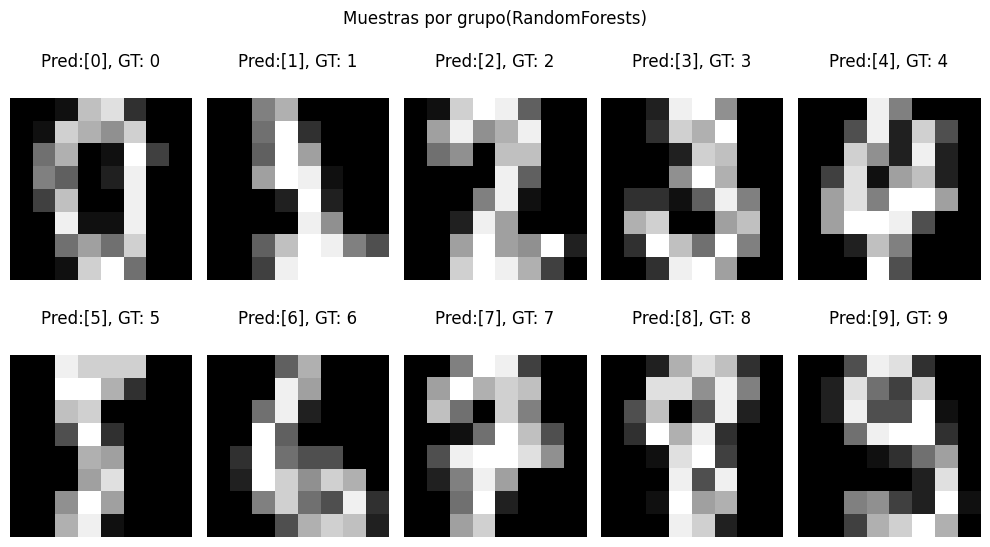

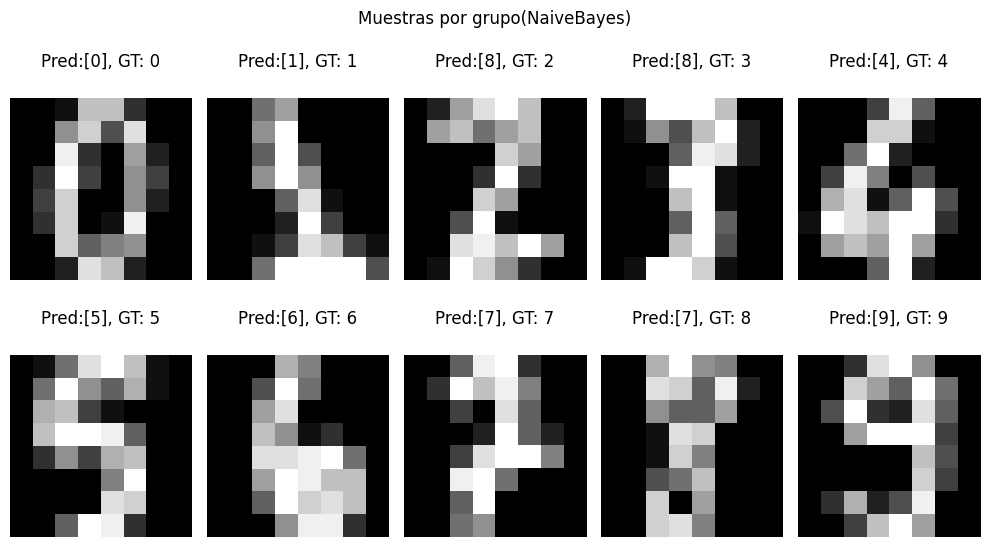

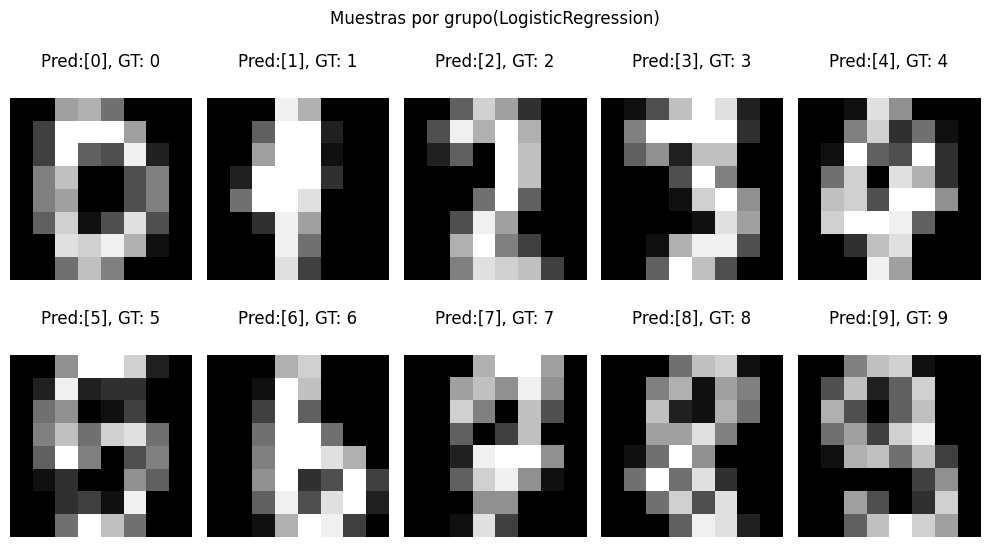

In [12]:
def vis_preds(trained_model, data_val, target_val, model_name):
    # Llamamos a inferencia de su modelo
    # Este método regresará una cantidad definida de clases
    # Que haya encontrado para los datos de validación
    preds = inference(modelo, data_val)
    group_pred = np.unique(preds)
    n_groups = len(group_pred)

    # Graficar
    n_cols = 5
    fig, axes = plt.subplots(n_groups//n_cols, n_cols, figsize=(10,6))
    axes = axes.flatten()
    for group, ax in zip(group_pred, axes):
        #======================= Start  solution=====================
        # TODO: Filtra data_val para quedarte solamente con aquellos elementos
        # donde la predicción de tu modelo sea igual a group
        # Haz lo mismo para las etiquetas
        data_val_filtrada=data_val[group==target_val]
        target_val_filtrada=target_val[group==target_val]

        # TODO: Selecciona una imagen de los datos en data_val donde pred == group
        # y selecciona la etiqueta real para dicha imagén para mostrarlos juntos
        # Investiga: np.random.randint, np.random.choice etc.
        indice=np.random.choice(len(data_val_filtrada))
        gt = target_val_filtrada[indice]
        img_vector = data_val_filtrada[indice]

        # TODO: Calcula la predicción del modelo para la imagen aleatoria
        # usando el modelo entrenado "trained_model"
        pred = inference(trained_model, img_vector)

        # TODO: La predicción del modelo usa la imagen en forma de vector (1xD)
        # pero para visualizarla tenemos que cambia de forma a una imagen de 8x8 pixeles
        # Cambia la forma de la imagen usando np.reshape a (8, 8)
        img = np.reshape(img_vector,(8,8))
        
        # TODO: Visualiza la imagen de 8x8 usando ax.matshow Similar al inicio del ejercicio
        # Revisa la documentación de ser necesario
        ax.matshow(img)

        #======================= end  solution=====================
        ax.set_title(f"Pred:{pred}, GT: {gt}")
        ax.axis('off')
    fig.suptitle(f"Muestras por grupo({model_name})")
    plt.tight_layout()
    plt.show()

for name, trained_model in trained_models.items():
    vis_preds(trained_model, data_val, target_val, name)

# Comparación de resultados
Como se vio anteriormente la conjuncion de los procesos culmina con la evaluacion resultante y visual del analisis de los datos mostrados en las imagenes anteriores, cuestionando cual es el mejor metodo implementado de los 3 que utilizamos para realizar el proyecto. 

A continuacion presentaremos la comparacion mediante el analisis de los dos resultados tanto en el resultado de comparar las imagenes como la comparacion del resultado en dos dimensiones. 

A primera vista tenemos como Random Forest nos proporciona una respuesta congruente con las imagenes y con los datos presentados, cumpliendo con la tarea. A su vez Regresion logistica muestra el exacto mismo resultado que Random Forest, apesar de que en la escala a dos dimensiones los resultados son diferentes la visualizacion con la comparacion de datos en imagenes es el mismo. Por otra parte Naive Bayes sufre de muchas carencias y de errores desde el resultado en la graficacion en segunda dimension y en la comparacion por imagenes, se puede considerar que no es viable para presentar esta actividad.

## 3.2 (Inferencia) Comparar rendimento de distintos modelos
En esta sección evalúa tus dos modelos entrenados en el conjunto de validación utilizando alguna métrica vista en clase (accuracy, F1, Precision, Recall etc.) y determina cuantitativamente cual funciona mejor. Investiga como usar las métricas de sklearn en la sección de [Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [13]:
from sklearn import metrics

# TODO: Para todos los modelos que entrenaste, calcula un valor 
# que indique la calidad de las predicciones en los datos de validación
# utiliza: data_val y target_val
for name, trained_model in trained_models.items():
    # Calcula la predicción y evalúa la calidad de predicción vs. las etiquetas reales (target_val)
    pred=inference(trained_model,data_val)
    score=metrics.precision_score(target_val,pred,average='macro')
    print(f"Modelo {name}: {score}")

Modelo RandomForests: 0.9743601278481933
Modelo NaiveBayes: 0.832149059222614
Modelo LogisticRegression: 0.9747207939119704


Como se puede visualizar en el resultado de estos datos, y de distintas corridad de los mismos procesos brotando diferentes resultados mas no muy alejados de este, se puede comprender como Naive Bayes no es el modelo mas optimo para esto y como Random Forest y Regresion logistica dan un resultado parecido.
En las ejecuciones se visualizo como el modelo mas constante a Random Forest considerando que su fluctuacion de resultado fue distinta solo por puntos decimales muy perqueños, a diferencia de Regresion logistica donde en las ejecuciones cambio su valor en porcentajes a 10 porciento, por ellos puede ser el rsultado ganador mas se tiene que entrenar y pulir el todos los procesos mejor. 
En caso de querer un modelo constante, que no tenga fluctuaciones altas y que sea positvo brindando una acertividad mayor al 97 prociento Random Forest es el indicado.